In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mostafanofal/two-million-rows-egyptian-datasets")

print("Path to dataset files:", path)

100%|██████████| 239M/239M [00:04<00:00, 56.3MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/mostafanofal/two-million-rows-egyptian-datasets/versions/4


In [2]:
import pandas as pd

main_df = pd.read_excel(path + "/2.Egyptian Tweets.xlsx")
main_df

,Text,Year,Source
0,review,2019,Arabic Egyptian tweets
1,اكبر خطا ترتكبه ان تعامل الناس باخلاقك انت مش ...,2019,Arabic Egyptian tweets
2,دائما اكره اخر ليله في كل مكان .,2019,Arabic Egyptian tweets
3,يارب اللى يسرق تويتاتى يدخل النار .,2019,Arabic Egyptian tweets
4,الاسراف فى تناول القهوة يسبب الوفاه .,2019,Arabic Egyptian tweets
...,...,...,...
39996,لنسعد ايامنا بالابتسامة بدلاً ان نملاها بالدموع.,2019,Arabic Egyptian tweets
39997,مش هقولك غير ان نص الضحك اللي ضحكته فى حياتي ك...,2019,Arabic Egyptian tweets
39998,ربنا يوفقك ويسهلك وان شاء الله تعدي الفترة دي ...,2019,Arabic Egyptian tweets
39999,مبسوطة اوى عملت طريقة مكرونة جديدة و هى دلوقتى...,2019,Arabic Egyptian tweets


To manually label it training as semi labeled

In [6]:
df = pd.read_csv("egyptian_tweets_sample_200.csv")
print(df.columns)

Index(['Text', 'Label'], dtype='object')


I manually Labeled roughly about 150 posts

🔍 Basic Data Overview
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    199 non-null    object
 1   Label   199 non-null    object
dtypes: object(2)
memory usage: 3.2+ KB
None

🧹 Nulls per column:
Text     0
Label    0
dtype: int64

📊 Label Distribution:
Label
idk    112
r       63
f       24
Name: count, dtype: int64

🔢 Label Percentages:
Label
idk    56.281407
r      31.658291
f      12.060302
Name: proportion, dtype: float64

⚖️ Skew Ratio (max/min count):
4.67


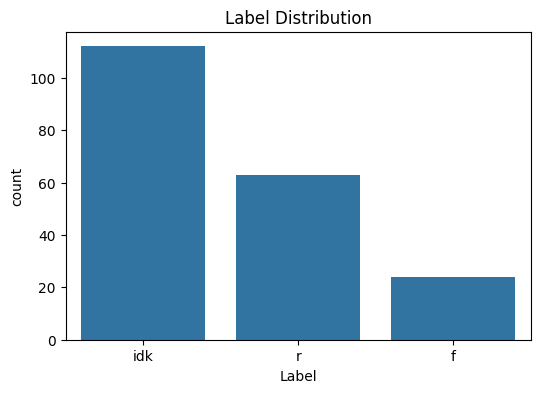


📏 Text Length Stats:
count    199.000000
mean      54.030151
std       28.034955
min       12.000000
25%       34.000000
50%       49.000000
75%       67.500000
max      163.000000
Name: TextLength, dtype: float64


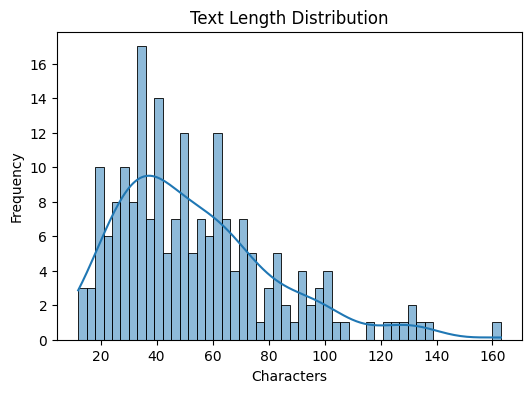


📌 Sample Entries:
                                                  Text Label  TextLength
112  قال النبي صلى الله عليه وسلم    من صلى علي صلا...     r         136
122  الطريق إلى الله طويل. ليس المهم أن تصل إلى آخر...     r          71
33   المجد للناس اللي بتلف من شارع تاني لما تلاقي ك...   idk          64
17                                 الرئيس الحنين رزق .     r          19
50                                ممكن رتويت يا جماعه.   idk          20


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Basic info
print("🔍 Basic Data Overview")
print(df.info())
print("\n🧹 Nulls per column:")
print(df.isnull().sum())

# Drop rows with missing text or label
df.dropna(subset=["Text", "Label"], inplace=True)

# Strip & clean
df["Text"] = df["Text"].astype(str).str.strip()
df["Label"] = df["Label"].astype(str).str.strip().str.lower()

# Remove empty rows after cleaning
df = df[(df["Text"] != "") & (df["Label"] != "")]

# Class distribution
print("\n📊 Label Distribution:")
print(df["Label"].value_counts())
print("\n🔢 Label Percentages:")
print(df["Label"].value_counts(normalize=True) * 100)

# Skewness in label distribution
print("\n⚖️ Skew Ratio (max/min count):")
counts = df["Label"].value_counts()
print(round(counts.max() / counts.min(), 2))

# Plot label distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="Label", order=counts.index)
plt.title("Label Distribution")
plt.show()

# Text length analysis
df["TextLength"] = df["Text"].apply(len)
print("\n📏 Text Length Stats:")
print(df["TextLength"].describe())

# Plot text length distribution
plt.figure(figsize=(6, 4))
sns.histplot(df["TextLength"], bins=50, kde=True)
plt.title("Text Length Distribution")
plt.xlabel("Characters")
plt.ylabel("Frequency")
plt.show()

# Optional: Preview some samples
print("\n📌 Sample Entries:")
print(df.sample(5))

In [8]:
df = df[df['Text'].str.len() <= 140] # Fixing the skewness

df = df.reset_index(drop=True)

🔍 Basic Data Overview
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Text        198 non-null    object
 1   Label       198 non-null    object
 2   TextLength  198 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 4.8+ KB
None

🧹 Nulls per column:
Text          0
Label         0
TextLength    0
dtype: int64

📊 Label Distribution:
Label
idk    111
r       63
f       24
Name: count, dtype: int64

🔢 Label Percentages:
Label
idk    56.060606
r      31.818182
f      12.121212
Name: proportion, dtype: float64

⚖️ Skew Ratio (max/min count):
4.62


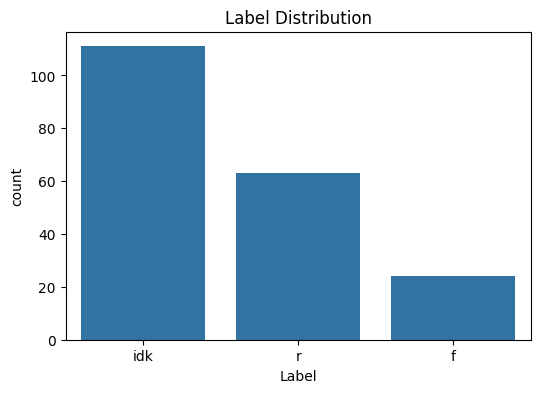


📏 Text Length Stats:
count    198.000000
mean      53.479798
std       27.006807
min       12.000000
25%       34.000000
50%       49.000000
75%       67.000000
max      136.000000
Name: TextLength, dtype: float64


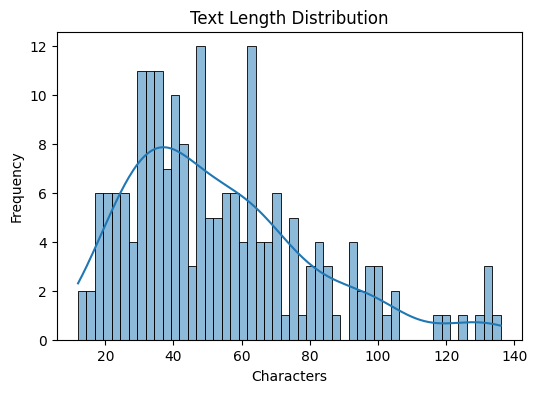


📌 Sample Entries:
                                                  Text Label  TextLength
189                 أعترف بفشلي في حفظي لكتاب الله   .   idk          34
59   ليكن من أعظم أهدافك في الحياة أن ينادي الله جب...     r          92
147                                تسلم بطمن عليك بس .   idk          19
177  وهي الدنيا الحلوة إيه غير ركعة وإبتسامة ورضا ر...     r          51
182                النهارده كان يوم مثالى بالنسبة لى .   idk          35


In [9]:
# Basic info
print("🔍 Basic Data Overview")
print(df.info())
print("\n🧹 Nulls per column:")
print(df.isnull().sum())

# Drop rows with missing text or label
df.dropna(subset=["Text", "Label"], inplace=True)

# Strip & clean
df["Text"] = df["Text"].astype(str).str.strip()
df["Label"] = df["Label"].astype(str).str.strip().str.lower()

# Remove empty rows after cleaning
df = df[(df["Text"] != "") & (df["Label"] != "")]

# Class distribution
print("\n📊 Label Distribution:")
print(df["Label"].value_counts())
print("\n🔢 Label Percentages:")
print(df["Label"].value_counts(normalize=True) * 100)

# Skewness in label distribution
print("\n⚖️ Skew Ratio (max/min count):")
counts = df["Label"].value_counts()
print(round(counts.max() / counts.min(), 2))

# Plot label distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="Label", order=counts.index)
plt.title("Label Distribution")
plt.show()

# Text length analysis
df["TextLength"] = df["Text"].apply(len)
print("\n📏 Text Length Stats:")
print(df["TextLength"].describe())

# Plot text length distribution
plt.figure(figsize=(6, 4))
sns.histplot(df["TextLength"], bins=50, kde=True)
plt.title("Text Length Distribution")
plt.xlabel("Characters")
plt.ylabel("Frequency")
plt.show()

# Preview some samples
print("\n📌 Sample Entries:")
print(df.sample(5))

In [12]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.utils.class_weight import compute_class_weight
from xgboost import XGBClassifier

# Preprocess DataFrame
df = df[['Text', 'Label']].copy()
df.dropna(subset=['Text', 'Label'], inplace=True)
df['Text'] = df['Text'].astype(str).str.strip()
df['Label'] = df['Label'].astype(str).str.strip().str.lower()
df = df[(df['Text'] != '') & (df['Label'] != '') & (df['Label'] != 'nan')]

# Encode labels
le = LabelEncoder()
y = le.fit_transform(df['Label'])

# Compute class weights
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y),
    y=y
)
class_weight_dict = dict(zip(np.unique(y), class_weights))
print("Class Weights:", dict(zip(le.classes_, class_weights)))

# Convert text to TF-IDF features
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['Text'])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

# Generate sample weights based on class
sample_weights = np.array([class_weight_dict[label] for label in y_train])

# Define and train XGBoost model
xgb = XGBClassifier(
    objective='multi:softprob',
    num_class=len(le.classes_),
    use_label_encoder=False,
    eval_metric='mlogloss',
    n_estimators=200,
    learning_rate=0.1,
    max_depth=4,
    random_state=42
)

xgb.fit(X_train, y_train, sample_weight=sample_weights)

# Predict
xgb_proba = xgb.predict_proba(X_test)
final_pred = xgb_proba.argmax(axis=1)

# Evaluation
print("\nClassification Report:")
print(classification_report(y_test, final_pred, target_names=le.classes_))

# Show sample predictions
for i in range(5):
    print(f"\nSample {i+1}:")
    print("Predicted Label:", le.inverse_transform([final_pred[i]])[0])
    print("Probabilities:", dict(zip(le.classes_, xgb_proba[i])))

Class Weights: {'f': np.float64(2.75), 'idk': np.float64(0.5945945945945946), 'r': np.float64(1.0476190476190477)}


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:43:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Classification Report:
              precision    recall  f1-score   support

           f       0.00      0.00      0.00         5
         idk       0.53      0.73      0.62        22
           r       0.33      0.23      0.27        13

    accuracy                           0.47        40
   macro avg       0.29      0.32      0.30        40
weighted avg       0.40      0.47      0.43        40


Sample 1:
Predicted Label: r
Probabilities: {'f': np.float32(0.14275143), 'idk': np.float32(0.30740333), 'r': np.float32(0.5498453)}

Sample 2:
Predicted Label: idk
Probabilities: {'f': np.float32(0.105225675), 'idk': np.float32(0.7831059), 'r': np.float32(0.11166842)}

Sample 3:
Predicted Label: r
Probabilities: {'f': np.float32(0.024343742), 'idk': np.float32(0.41713142), 'r': np.float32(0.5585248)}

Sample 4:
Predicted Label: idk
Probabilities: {'f': np.float32(0.039574903), 'idk': np.float32(0.86298156), 'r': np.float32(0.097443566)}

Sample 5:
Predicted Label: f
Probabilities: {'f':

Since the model accuracy is very bad here comes the tricky part, iam planning to use that model to label all the 40k dataframe and only add the predictions with probability higher than 0.9 or so which we are sure its perfect and add it to my manual labels

In [13]:
# Drop first 200 rows
unlabeled_df = main_df.iloc[200:].copy()

# Clean text
unlabeled_df['Text'] = unlabeled_df['Text'].astype(str).str.strip()
unlabeled_df = unlabeled_df[unlabeled_df['Text'] != '']

# Vectorize using the existing fitted TF-IDF vectorizer
X_unlabeled = vectorizer.transform(unlabeled_df['Text'])

# Predict probabilities with trained XGBoost model
proba = xgb.predict_proba(X_unlabeled)
confidences = np.max(proba, axis=1)
predicted_classes = np.argmax(proba, axis=1)

# Apply confidence threshold
threshold = 0.9
mask = confidences >= threshold

# Create pseudo-labeled DataFrame
pseudo_labeled = unlabeled_df[mask].copy()
pseudo_labeled['Label'] = le.inverse_transform(predicted_classes[mask])

print(f"Selected {len(pseudo_labeled)} pseudo-labeled samples with confidence ≥ {threshold}")

# Combine with original labeled data
combined_df = pd.concat([df, pseudo_labeled], ignore_index=True)

Selected 2645 pseudo-labeled samples with confidence ≥ 0.9


Ahahaha it works!

In [14]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.utils.class_weight import compute_class_weight
from xgboost import XGBClassifier

# Preprocess DataFrame
df = combined_df.copy()
df.dropna(subset=['Text', 'Label'], inplace=True)
df['Text'] = df['Text'].astype(str).str.strip()
df['Label'] = df['Label'].astype(str).str.strip().str.lower()
df = df[(df['Text'] != '') & (df['Label'] != '') & (df['Label'] != 'nan')]

# Encode labels
le = LabelEncoder()
y = le.fit_transform(df['Label'])

# Compute class weights
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y),
    y=y
)
class_weight_dict = dict(zip(np.unique(y), class_weights))
print("Class Weights:", dict(zip(le.classes_, class_weights)))

# Convert text to TF-IDF features
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['Text'])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

# Generate sample weights based on class
sample_weights = np.array([class_weight_dict[label] for label in y_train])

# Define and train XGBoost model
xgb = XGBClassifier(
    objective='multi:softprob',
    num_class=len(le.classes_),
    use_label_encoder=False,
    eval_metric='mlogloss',
    n_estimators=200,
    learning_rate=0.1,
    max_depth=4,
    random_state=42
)

xgb.fit(X_train, y_train, sample_weight=sample_weights)

# Predict
xgb_proba = xgb.predict_proba(X_test)
final_pred = xgb_proba.argmax(axis=1)

# Evaluation
print("\nClassification Report:")
print(classification_report(y_test, final_pred, target_names=le.classes_))

# Show sample predictions
for i in range(5):
    print(f"\nSample {i+1}:")
    print("Predicted Label:", le.inverse_transform([final_pred[i]])[0])
    print("Probabilities:", dict(zip(le.classes_, xgb_proba[i])))

Class Weights: {'f': np.float64(12.149572649572649), 'idk': np.float64(0.38460497835497837), 'r': np.float64(3.1483942414174972)}


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:50:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Classification Report:
              precision    recall  f1-score   support

           f       0.62      0.62      0.62        16
         idk       0.98      0.97      0.97       493
           r       0.77      0.85      0.81        60

    accuracy                           0.94       569
   macro avg       0.79      0.81      0.80       569
weighted avg       0.95      0.94      0.94       569


Sample 1:
Predicted Label: idk
Probabilities: {'f': np.float32(0.001052269), 'idk': np.float32(0.99502975), 'r': np.float32(0.003918041)}

Sample 2:
Predicted Label: idk
Probabilities: {'f': np.float32(0.0077915504), 'idk': np.float32(0.91915756), 'r': np.float32(0.07305091)}

Sample 3:
Predicted Label: r
Probabilities: {'f': np.float32(0.0034774474), 'idk': np.float32(0.0056266785), 'r': np.float32(0.9908958)}

Sample 4:
Predicted Label: idk
Probabilities: {'f': np.float32(0.00082783017), 'idk': np.float32(0.99289906), 'r': np.float32(0.0062730922)}

Sample 5:
Predicted Label: idk
Proba

Decent accuracy, i can repeat the process but iam too lazy to do so, therefore i will just make it filter it to another high probability

In [15]:
# Get pseudo-labels for the rest of the data
X_all_unlabeled = vectorizer.transform(main_df['Text'])  # Vectorize entire main_df
proba_all = xgb.predict_proba(X_all_unlabeled)           # Get predicted probabilities

# Apply threshold for confident predictions (≥0.7 probability)
confidences_all = np.max(proba_all, axis=1)
predicted_classes_all = np.argmax(proba_all, axis=1)
mask_all = confidences_all >= 0.7  # Set threshold to 0.7

# Create the final pseudo-labeled dataframe
final_pseudo_labeled = main_df[mask_all].copy()
final_pseudo_labeled['Label'] = le.inverse_transform(predicted_classes_all[mask_all])

# Combine with original labeled data
final_combined_df = pd.concat([df, final_pseudo_labeled], ignore_index=True)

# Optional: Save the newly labeled dataset
final_combined_df.to_csv("labeled_40k.csv", index=False)
final_combined_df

,Text,Label,Year,Source
0,بقالي كتير اوي مكلتش شاورما حلوة كده .,idk,NaN,NaN
1,اكبر خطا ترتكبه ان تعامل الناس باخلاقك انت مش ...,r,NaN,NaN
2,دائما اكره اخر ليله في كل مكان .,idk,NaN,NaN
3,يارب اللى يسرق تويتاتى يدخل النار .,idk,NaN,NaN
4,الاسراف فى تناول القهوة يسبب الوفاه .,r,NaN,NaN
...,...,...,...,...
23409,المفروض يلغوا الامتحانات علشان نحتفل بالسنة ال...,idk,2019.0,Arabic Egyptian tweets
23410,مش هقولك غير ان نص الضحك اللي ضحكته فى حياتي ك...,r,2019.0,Arabic Egyptian tweets
23411,ربنا يوفقك ويسهلك وان شاء الله تعدي الفترة دي ...,idk,2019.0,Arabic Egyptian tweets
23412,مبسوطة اوى عملت طريقة مكرونة جديدة و هى دلوقتى...,f,2019.0,Arabic Egyptian tweets


🔍 Basic Data Overview
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23414 entries, 0 to 23413
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Text    23414 non-null  object 
 1   Label   23414 non-null  object 
 2   Year    23216 non-null  float64
 3   Source  23216 non-null  object 
dtypes: float64(1), object(3)
memory usage: 731.8+ KB
None

🧹 Nulls per column:
Text        0
Label       0
Year      198
Source    198
dtype: int64

📊 Label Distribution:
Label
idk    16240
r       5533
f       1641
Name: count, dtype: int64

🔢 Label Percentages:
Label
idk    69.360212
r      23.631161
f       7.008627
Name: proportion, dtype: float64

⚖️ Skew Ratio (max/min count):
9.9


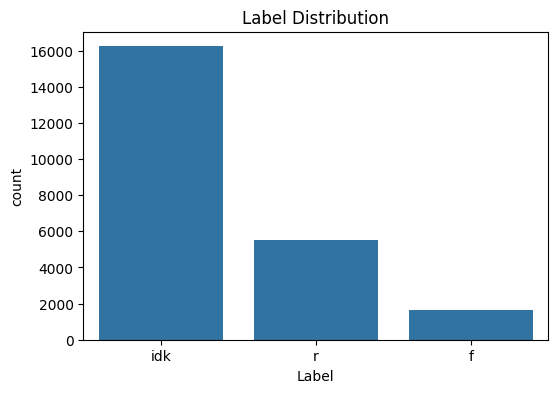


📏 Text Length Stats:
count    23414.000000
mean        54.965064
std         26.229474
min          6.000000
25%         35.000000
50%         51.000000
75%         70.000000
max        222.000000
Name: TextLength, dtype: float64


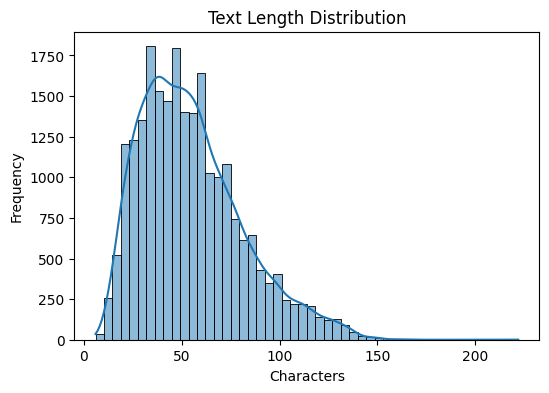


📌 Sample Entries:
                                                    Text Label    Year  \
36                        عيني بدات تحرقني مش عارفه ليه.   idk     NaN   
15419  هيجي اليوم اللي هتعوض فيه كل احلامك طول ما انت...   idk  2019.0   
3970   عندي احساس ان بعض الفنانين لما بيتجوزوا بعض ال...     r  2019.0   
5171   دماغى ورمت من سماعات الدى جى اللى فى الشارع عل...     r  2019.0   
14298  يا رب احفظهم من الزلزال و البركان . ما اتخيل ش...   idk  2019.0   

                       Source  TextLength  
36                        NaN          30  
15419  Arabic Egyptian tweets          55  
3970   Arabic Egyptian tweets          85  
5171   Arabic Egyptian tweets          68  
14298  Arabic Egyptian tweets          58  


In [16]:
df = pd.read_csv("labeled_40k.csv")

# Basic info
print("🔍 Basic Data Overview")
print(df.info())
print("\n🧹 Nulls per column:")
print(df.isnull().sum())

# Drop rows with missing text or label
df.dropna(subset=["Text", "Label"], inplace=True)

# Strip & clean
df["Text"] = df["Text"].astype(str).str.strip()
df["Label"] = df["Label"].astype(str).str.strip().str.lower()

# Remove empty rows after cleaning
df = df[(df["Text"] != "") & (df["Label"] != "")]

# Class distribution
print("\n📊 Label Distribution:")
print(df["Label"].value_counts())
print("\n🔢 Label Percentages:")
print(df["Label"].value_counts(normalize=True) * 100)

# Skewness in label distribution
print("\n⚖️ Skew Ratio (max/min count):")
counts = df["Label"].value_counts()
print(round(counts.max() / counts.min(), 2))

# Plot label distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="Label", order=counts.index)
plt.title("Label Distribution")
plt.show()

# Text length analysis
df["TextLength"] = df["Text"].apply(len)
print("\n📏 Text Length Stats:")
print(df["TextLength"].describe())

# Plot text length distribution
plt.figure(figsize=(6, 4))
sns.histplot(df["TextLength"], bins=50, kde=True)
plt.title("Text Length Distribution")
plt.xlabel("Characters")
plt.ylabel("Frequency")
plt.show()

# Optional: Preview some samples
print("\n📌 Sample Entries:")
print(df.sample(5))

In [17]:
df = df[df['Text'].str.len() <= 120] # Fixing more skewness
df = df.reset_index(drop=True)

🔍 Basic Data Overview
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22906 entries, 0 to 22905
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Text        22906 non-null  object 
 1   Label       22906 non-null  object 
 2   Year        22715 non-null  float64
 3   Source      22715 non-null  object 
 4   TextLength  22906 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 894.9+ KB
None

🧹 Nulls per column:
Text            0
Label           0
Year          191
Source        191
TextLength      0
dtype: int64

📊 Label Distribution:
Label
idk    16003
r       5286
f       1617
Name: count, dtype: int64

🔢 Label Percentages:
Label
idk    69.863791
r      23.076923
f       7.059286
Name: proportion, dtype: float64

⚖️ Skew Ratio (max/min count):
9.9


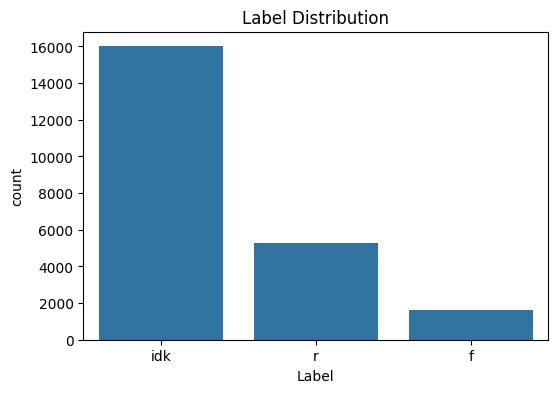


📏 Text Length Stats:
count    22906.000000
mean        53.280363
std         23.888798
min          6.000000
25%         35.000000
50%         50.000000
75%         68.000000
max        120.000000
Name: TextLength, dtype: float64


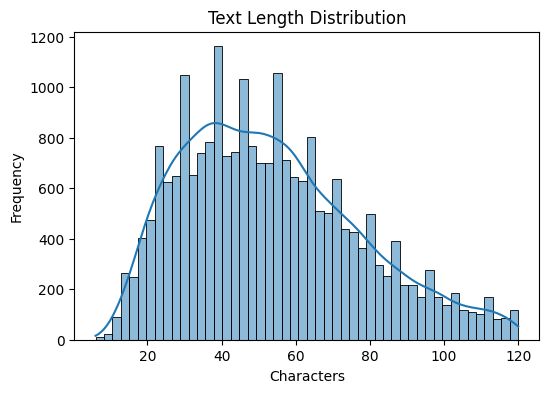


📌 Sample Entries:
                                                    Text Label    Year  \
123    على الرغم ان يوم الجمعه يوم مبارك . بس مش بحس ...     r     NaN   
4508                          الجوع مش كافر ده ابن كلب .   idk  2019.0   
21846               أتعجب من قولهم الخير يخص والشر يعم .     r  2019.0   
9274   اضحك وخليك واثق في ربنا انه منزلش عليك ابتلاء ...   idk  2019.0   
4833   حقيقة غاب هتلر فظهر اليهود ، وغاب صدام فظهر ال...     f  2019.0   

                       Source  TextLength  
123                       NaN          61  
4508   Arabic Egyptian tweets          26  
21846  Arabic Egyptian tweets          36  
9274   Arabic Egyptian tweets          62  
4833   Arabic Egyptian tweets          54  


In [18]:
# Basic info
print("🔍 Basic Data Overview")
print(df.info())
print("\n🧹 Nulls per column:")
print(df.isnull().sum())

# Drop rows with missing text or label
df.dropna(subset=["Text", "Label"], inplace=True)

# Strip & clean
df["Text"] = df["Text"].astype(str).str.strip()
df["Label"] = df["Label"].astype(str).str.strip().str.lower()

# Remove empty rows after cleaning
df = df[(df["Text"] != "") & (df["Label"] != "")]

# Class distribution
print("\n📊 Label Distribution:")
print(df["Label"].value_counts())
print("\n🔢 Label Percentages:")
print(df["Label"].value_counts(normalize=True) * 100)

# Skewness in label distribution
print("\n⚖️ Skew Ratio (max/min count):")
counts = df["Label"].value_counts()
print(round(counts.max() / counts.min(), 2))

# Plot label distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="Label", order=counts.index)
plt.title("Label Distribution")
plt.show()

# Text length analysis
df["TextLength"] = df["Text"].apply(len)
print("\n📏 Text Length Stats:")
print(df["TextLength"].describe())

# Plot text length distribution
plt.figure(figsize=(6, 4))
sns.histplot(df["TextLength"], bins=50, kde=True)
plt.title("Text Length Distribution")
plt.xlabel("Characters")
plt.ylabel("Frequency")
plt.show()

# Optional: Preview some samples
print("\n📌 Sample Entries:")
print(df.sample(5))

In [23]:
import xgboost as xgb
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
import pandas as pd
import numpy as np


final_combined_df.dropna(subset=['Year', 'Source'], inplace=True)

# Preprocess Text (same as before)
vectorizer = TfidfVectorizer(max_features=5000)
X_all = vectorizer.fit_transform(final_combined_df['Text'])

# Encode labels
le = LabelEncoder()
y_all = le.fit_transform(final_combined_df['Label'])

# Compute class weights (for handling imbalanced classes)
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_all),
    y=y_all
)
class_weight_dict = dict(zip(np.unique(y_all), class_weights))

# Train-test split (optional, but usually helps)
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, stratify=y_all, test_size=0.1, random_state=42)

# Define XGBoost model
xgb_model = xgb.XGBClassifier(
    max_depth=6,
    n_estimators=100,
    learning_rate=0.1,
    scale_pos_weight=class_weight_dict.get(1, 1),  # Adjust for class imbalance (you can tweak this)
    objective='multi:softmax',  # For multiclass classification
    num_class=3,  # Number of classes (adjust if more classes)
    random_state=42
)

# Train the XGBoost model on all data
xgb_model.fit(X_train, y_train)

# Predictions and Evaluation
y_pred = xgb_model.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Check final accuracy
accuracy = (y_pred == y_test).mean()
print(f"Final Accuracy: {accuracy:.4f}")

# Optionally, you can save the trained model for later use
import joblib
joblib.dump(xgb_model, "final_xgb_model.pkl")
joblib.dump(vectorizer, 'final_vectorizer.pkl')

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [00:09:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)



Classification Report:
              precision    recall  f1-score   support

           f       0.97      0.98      0.97       162
         idk       0.99      1.00      0.99      1613
           r       0.98      0.96      0.97       547

    accuracy                           0.98      2322
   macro avg       0.98      0.98      0.98      2322
weighted avg       0.98      0.98      0.98      2322

Final Accuracy: 0.9849


['final_vectorizer.pkl']

I saved the model for whoever see this and want to use it or enhance it later, also feel free to input some arabic post or text and test it

In [28]:
import joblib
import numpy as np

# Load the trained XGBoost model and the fitted vectorizer
xgb_model = joblib.load("final_xgb_model.pkl")  # Load the saved model
vectorizer = joblib.load("final_vectorizer.pkl")  # Load the saved fitted vectorizer

# Example input text
input_text = input("Enter your arabic text news or text here: ")

# Transform the input text into the same TF-IDF feature space used in training
X_input = vectorizer.transform([input_text])

# Predict the probabilities
proba = xgb_model.predict_proba(X_input)

# Get the predicted class and its probability
predicted_class = xgb_model.predict(X_input)
predicted_label = le.inverse_transform(predicted_class)[0]  # Convert numeric label back to string
confidence = np.max(proba)  # Maximum probability

# Print results
print(f"Predicted Label: {predicted_label}")
print(f"Confidence: {confidence:.4f}")
print(f"Class Probabilities: {dict(zip(le.classes_, proba[0]))}")

Enter your arabic text news or text here: الناس دي كلها كدابة
Predicted Label: f
Confidence: 0.9967
Class Probabilities: {'f': np.float32(0.99671054), 'idk': np.float32(0.00056090206), 'r': np.float32(0.0027284657)}


My test shows that its alittle optimistic lol
Although it needs enhancement and training on more news data to be ok to go
I will do so in the next update its just a Beta to test some theories